In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection

In [68]:
hit = pd.read_csv("Hitters.csv") #csv oku
df = hit.copy()                  #kopya oluştur
df = df.dropna()                 #NA değerlerini at
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"] #bağımlı değişken
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64") 
X = pd.concat([X_, dms[["League_A", "League_N", "Division_E", "Division_W", "NewLeague_A", "NewLeague_N"]]], axis= 1) #bağımsız değişken 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [69]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [70]:
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [71]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [72]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,375.0,632.0,43.0,10.0,0,1,0,1,0,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,263.0,880.0,82.0,14.0,1,0,0,1,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,...,354.0,200.0,11.0,3.0,0,1,1,0,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,33.0,805.0,40.0,4.0,0,1,1,0,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,...,194.0,282.0,421.0,25.0,1,0,0,1,1,0


In [73]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

## KNN Modeli Oluşturma

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### İlkel Test Hatası

In [76]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [77]:
knn_model.n_neighbors

# k değeri

5

#### Farklı k değerleri için gözlem 

In [78]:
RMSE = []

for k in range(10):
    
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k = ", k , "için RMSE değeri: ", rmse)

k =  1 için RMSE değeri:  0.0
k =  2 için RMSE değeri:  179.52761335480352
k =  3 için RMSE değeri:  205.20157172291863
k =  4 için RMSE değeri:  220.5139794876305
k =  5 için RMSE değeri:  239.64671325413764
k =  6 için RMSE değeri:  243.5904190007242
k =  7 için RMSE değeri:  258.1478781634636
k =  8 için RMSE değeri:  266.05374203349805
k =  9 için RMSE değeri:  269.73782093553376
k =  10 için RMSE değeri:  271.2798300436963


### Model Tuning

In [79]:
knn_params = {"n_neighbors": np.arange(1, 30, 1)}

In [80]:
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv= 10, )
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
knn_cv_model.best_params_["n_neighbors"]

8

In [82]:
RMSE = []
RMSE_CV = []

RMSE = []
RMSE_CV = []

for k in range(10):
    
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1 * cross_val_score(knn_model, X_train, y_train, cv= 10, scoring= "neg_mean_squared_error")).mean()
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k = ", k , "için RMSE değeri: ", rmse , "RMSE_CV değeri: ", rmse_cv )

k =  1 için RMSE değeri:  0.0 RMSE_CV değeri:  314.00484847632146
k =  2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  286.3603325067769
k =  3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  273.9931666607254
k =  4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  275.7180399577597
k =  5 için RMSE değeri:  239.64671325413764 RMSE_CV değeri:  278.63565154224034
k =  6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  284.4231965885962
k =  7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  280.0247076065351
k =  8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  276.2836061510732
k =  9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  280.327057055243
k =  10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  287.23959512744636


In [122]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [123]:
y_pred = knn_tuned.predict(X_test)
test_error = np.sqrt(mean_squared_error(y_test, y_pred))

In [124]:
print("KNN Test Hatası = ", test_error)

KNN Test Hatası =  413.7094731463598


In [125]:
# mikowski = KNN Test Hatası =  413.7094731463598 
# manhattan = KNN Test Hatası =  401.8395287413436
# eucliden = KNN Test Hatası =  413.7094731463598

## SVR Modeli Oluşturma

In [126]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [149]:
from sklearn.svm import SVR

In [128]:
svr_model = SVR("linear")
svr_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [129]:
print("y = {0} + {1} * X".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 * X


In [130]:
y_pred = svr_model.predict(X_train)

In [134]:
-48.69756097561513 + 4.969512195122093 * 91

403.5280487804953

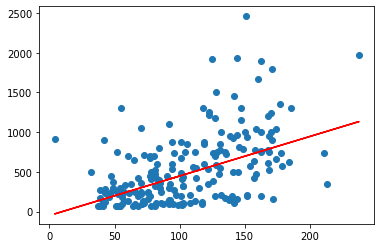

In [135]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color= "r");

In [150]:
from sklearn.linear_model import LinearRegression 

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} * X".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 * X


In [137]:
-8.814095480334572 + 5.1724561354706875 * 91

461.879412847498

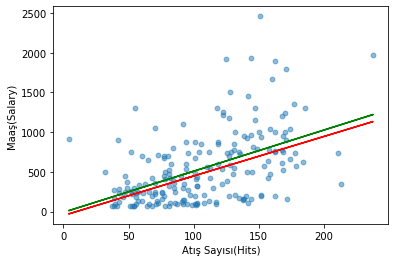

In [138]:
plt.scatter(X_train, y_train, alpha= 0.5, s=23)
plt.plot(X_train, lm_pred, "g")
plt.plot(X_train, y_pred, color= "r")

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

### Tahmin

In [139]:
print("y = {0} + {1} * X".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 * X


In [140]:
svr_model.predict([[91]])

array([403.52804878])

In [141]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

### Model Tuning

In [142]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [143]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv= 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [144]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [152]:
svr_tuned = SVR("linear", C= pd.Series(svr_cv_model.best_params_)[0])
svr_tuned.fit(X_train, y_train)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [153]:
y_pred = svr_tuned.predict(X_test)
test_error = np.sqrt(mean_squared_error(y_test, y_pred))

In [154]:
print("SVR Test Hatası = ", test_error)

SVR Test Hatası =  458.198966781116


## ANN Model Oluşturma

#### Bağımsız değişkenin test ve train setine scaler.transform() işlemi uygulanır.

In [155]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [158]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### MLP

In [159]:
from sklearn.neural_network import MLPRegressor

In [160]:
mlp_model = MLPRegressor()
mlp_model.fit(X_train_scaled, y_train)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)